<a href="https://colab.research.google.com/github/AbhashTi/smoking_binary_classification/blob/main/iiitb_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

## EDA And Preprocessing

In [ ]:
print(f"The training dataset consists of {train.shape[0]} rows and {train.shape[1]} columns.")


The training dataset consists of 38984 rows and 23 columns.


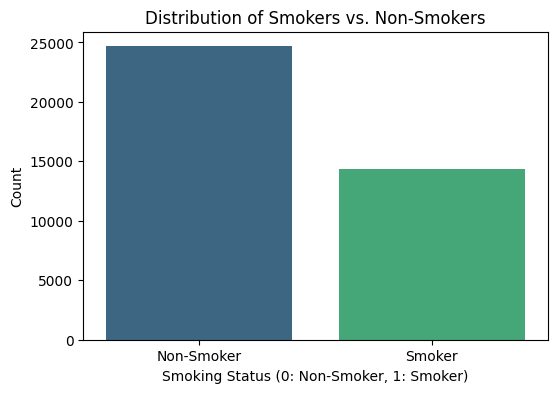

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='smoking', data=train, palette='viridis')
plt.title('Distribution of Smokers vs. Non-Smokers')
plt.xlabel('Smoking Status (0: Non-Smoker, 1: Smoker)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

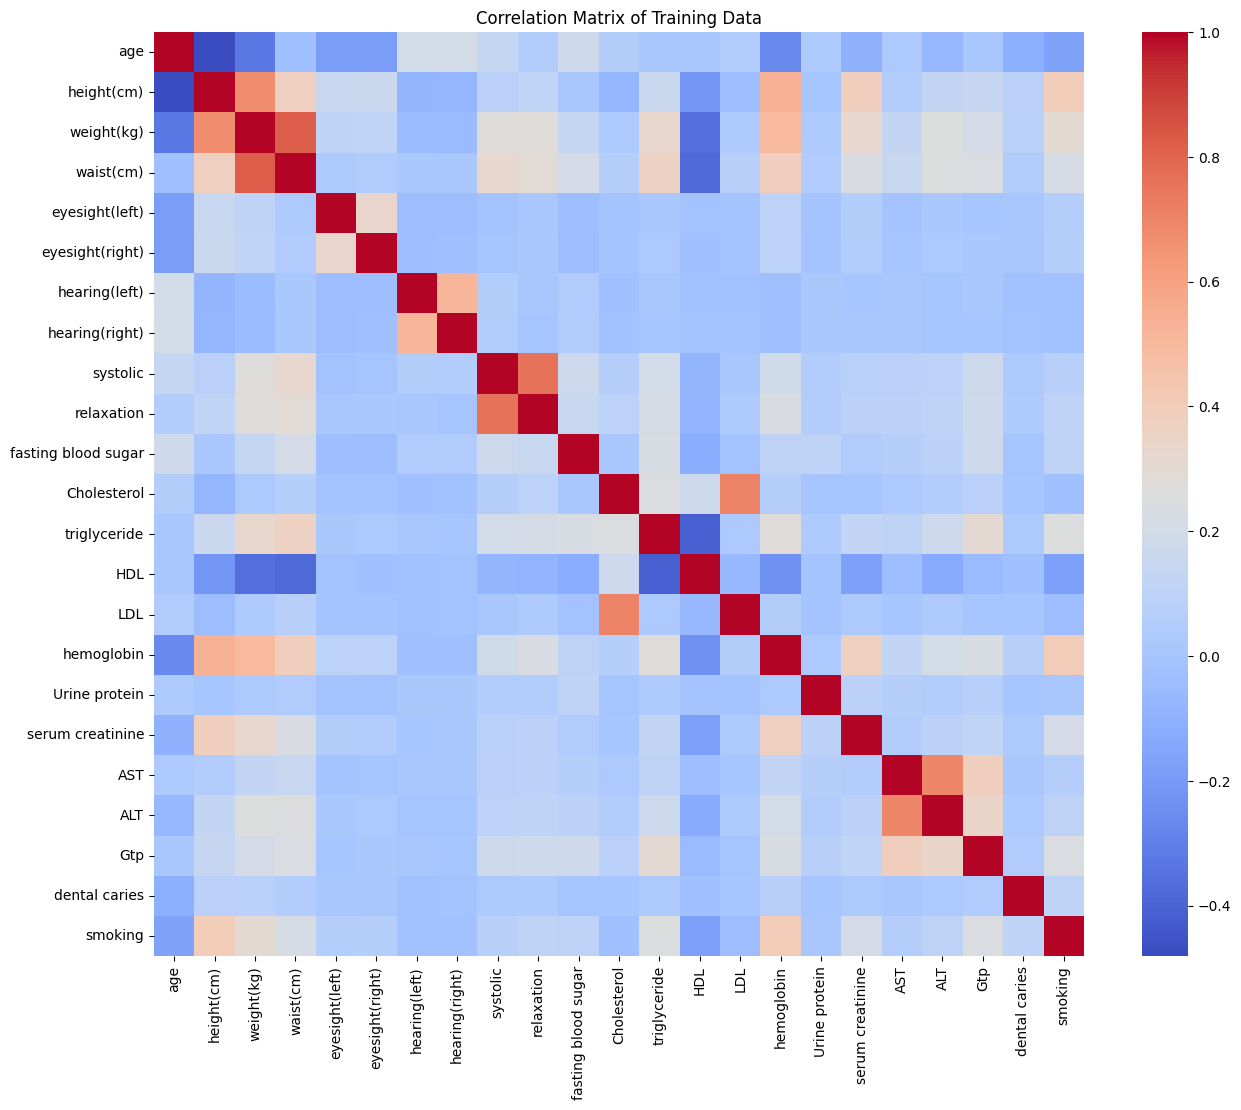

In [ ]:
correlation_matrix = train.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Training Data')
plt.show()

In [ ]:
print("First 5 rows of the train dataset:")
print(train.head())

print("\nInformation about the train dataset:")
train.info()

print("\nMissing values in each column of the train dataset:")
print(train.isnull().sum())

First 5 rows of the train dataset:
   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   AL

In [ ]:
print("Shape of train before dropping missing values:", train.shape)
train_cleaned = train.dropna(subset=['smoking']).copy()
print("Shape of train after dropping missing values in 'smoking' column:", train_cleaned.shape)

# Separate features (X_train) and target (y_train)
X_train = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Prepare X_test, ensuring column consistency with X_train
X_test = test[X_train.columns]

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

Shape of train before dropping missing values: (55692, 23)
Shape of train after dropping missing values in 'smoking' column: (38984, 23)

X_train shape: (38984, 22)
y_train shape: (38984,)
X_test shape: (16708, 22)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames, maintaining column names
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("X_train after scaling (first 5 rows):")
print(X_train.head())
print("\nX_test after scaling (first 5 rows):")
print(X_test.head())

X_train after scaling (first 5 rows):
        age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0 -0.756634    0.578022    1.478029   1.601630       -0.230592   
1 -2.000064    1.122246    3.416553   2.995481       -0.631779   
2  0.072319   -1.054651   -0.072789   0.422217       -0.230592   
3  0.072319    0.033798    1.090325   1.279972       -0.431185   
4 -2.000064    0.033798   -0.460494  -0.113879        0.972969   

   eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  ...  \
0        -0.220264      -0.161337       -0.163996 -0.254749    0.207648  ...   
1        -0.220264      -0.161337       -0.163996 -0.181453    0.311183  ...   
2        -0.220264      -0.161337       -0.163996 -0.841116    0.414717  ...   
3        -0.625281      -0.161337       -0.163996  2.677083    1.242994  ...   
4        -1.840332      -0.161337       -0.163996 -0.914411   -1.241836  ...   

   triglyceride       HDL       LDL  hemoglobin  Urine protein  \
0      0.365595  0

In [ ]:
train.isna().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


## Model Training

## KNN

<Figure size 800x600 with 0 Axes>

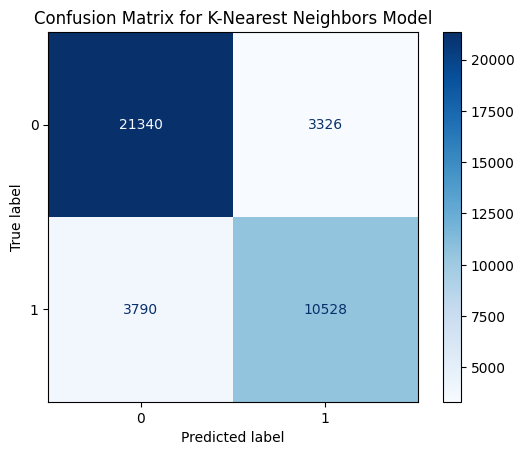

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies due to NameError ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train KNeighborsClassifier model (as done in previous steps)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training data (as done in previous steps)
y_pred_knn = knn_model.predict(X_train)
# --- End re-definition of dependencies ---

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_knn)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

# Display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for K-Nearest Neighbors Model')
plt.show()

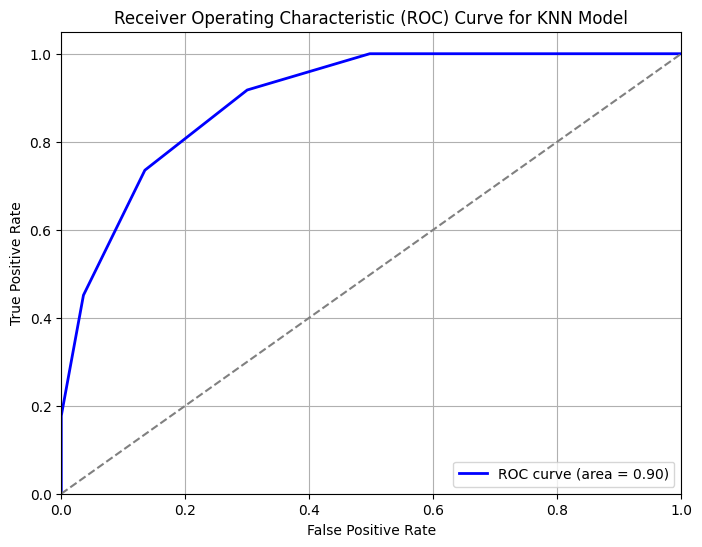

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies due to NameError ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train KNeighborsClassifier model (as done in previous steps)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Get probability predictions for ROC-AUC (as done in previous steps)
y_prob_knn = knn_model.predict_proba(X_train)[:, 1]

# Calculate ROC-AUC score (as done in previous steps)
roc_auc_knn = roc_auc_score(y_train, y_prob_knn)
# --- End re-definition of dependencies ---

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_prob_knn)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal dashed line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Logistic Regression


<Figure size 800x600 with 0 Axes>

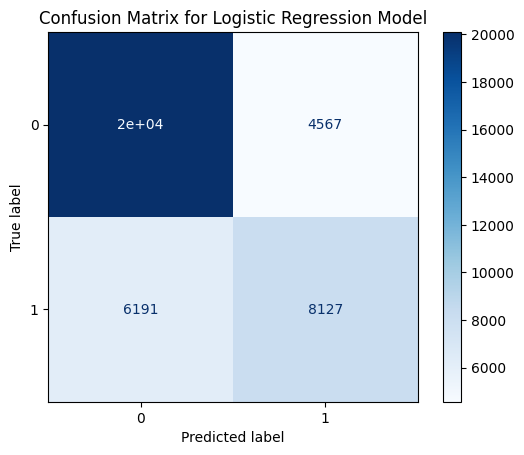

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies due to NameError ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train LogisticRegression model (as done in previous steps)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the training data (as done in previous steps)
y_pred_lr = lr_model.predict(X_train)
# --- End re-definition of dependencies ---

# Compute the confusion matrix
cm_lr = confusion_matrix(y_train, y_pred_lr)

# Create a ConfusionMatrixDisplay object
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)

# Display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

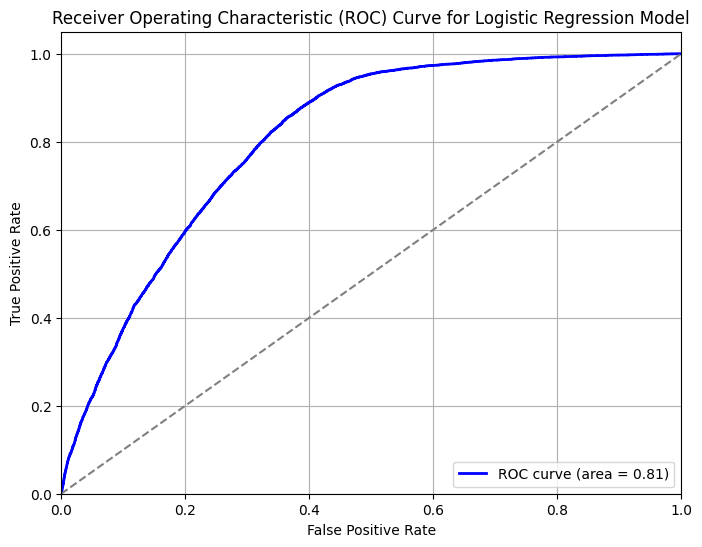

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train LogisticRegression model (as done in previous steps)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Get probability predictions for ROC-AUC (as done in previous steps)
y_prob_lr = lr_model.predict_proba(X_train)[:, 1]

# Calculate ROC-AUC score (as done in previous steps)
roc_auc_lr = roc_auc_score(y_train, y_prob_lr)
# --- End re-definition of dependencies ---

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_prob_lr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal dashed line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Linear SVM


<Figure size 800x600 with 0 Axes>

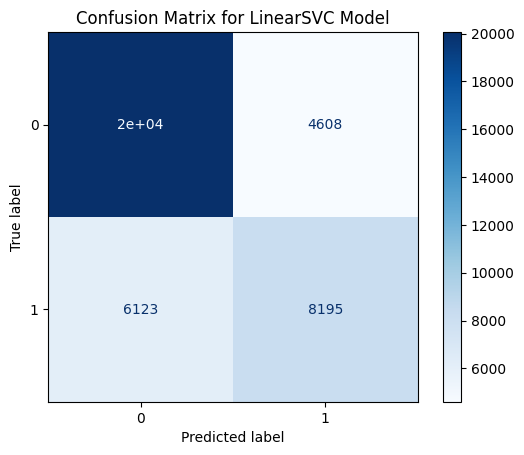

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train LinearSVC model (as done in previous steps)
linear_svc_model = LinearSVC(random_state=42, max_iter=1000)
linear_svc_model.fit(X_train, y_train)

# Make predictions on the training data (as done in previous steps)
y_pred_linear_svc = linear_svc_model.predict(X_train)
# --- End re-definition of dependencies ---

# Compute the confusion matrix
cm_linear_svc = confusion_matrix(y_train, y_pred_linear_svc)

# Create a ConfusionMatrixDisplay object
disp_linear_svc = ConfusionMatrixDisplay(confusion_matrix=cm_linear_svc, display_labels=linear_svc_model.classes_)

# Display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp_linear_svc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for LinearSVC Model')
plt.show()

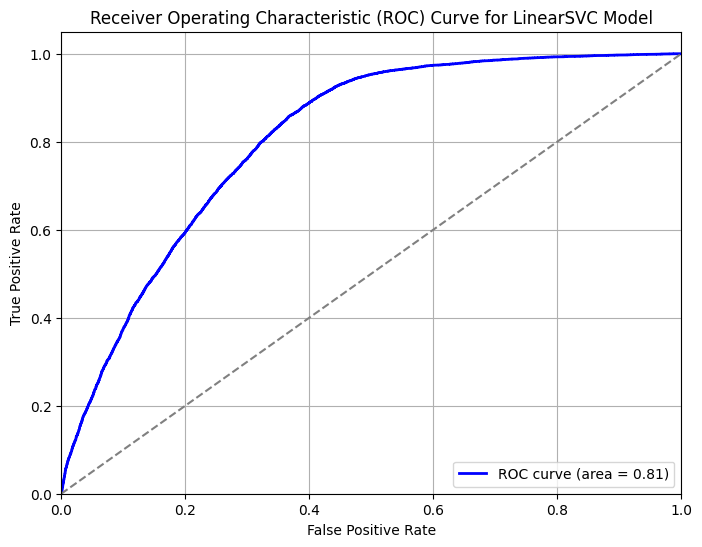

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# Load the training dataset (assuming it's available in the environment)
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Initialize and train LinearSVC model (as done in previous steps)
linear_svc_model = LinearSVC(random_state=42, max_iter=1000)
linear_svc_model.fit(X_train, y_train)

# Get decision function scores for ROC-AUC
y_score_linear_svc = linear_svc_model.decision_function(X_train)

# Calculate ROC-AUC score (as done in previous steps)
roc_auc_linear_svc = roc_auc_score(y_train, y_score_linear_svc)
# --- End re-definition of dependencies ---

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_linear_svc, tpr_linear_svc, thresholds_linear_svc = roc_curve(y_train, y_score_linear_svc)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear_svc, tpr_linear_svc, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_linear_svc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal dashed line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LinearSVC Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## kernel SVM

Training SVC (RBF Kernel) model...
SVC (RBF Kernel) model trained successfully.


<Figure size 800x600 with 0 Axes>

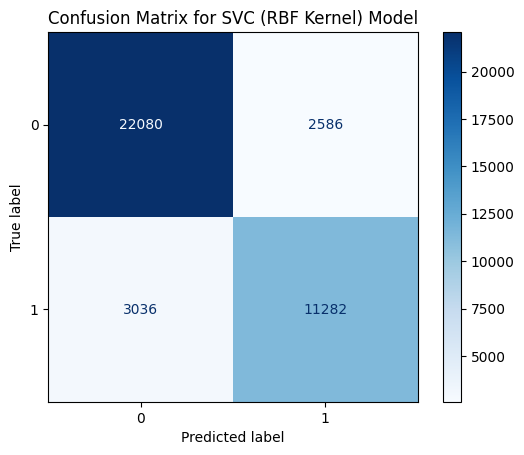

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# 2. Reload the training dataset
train = pd.read_csv("train_dataset.csv")

# 3. Clean the train DataFrame
train_cleaned = train.dropna(subset=['smoking']).copy()

# 4. Separate features (X_train_unscaled) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# 5. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# 6. Initialize and train SVC model
svc_rbf_model = SVC(kernel='rbf', gamma=0.166, C=1.0, random_state=42, probability=True)
print("Training SVC (RBF Kernel) model...")
svc_rbf_model.fit(X_train, y_train)
print("SVC (RBF Kernel) model trained successfully.")

# 7. Make predictions on the training data
y_pred_svc_rbf = svc_rbf_model.predict(X_train)
# --- End re-definition of dependencies ---

# 8. Compute the confusion matrix
cm_svc_rbf = confusion_matrix(y_train, y_pred_svc_rbf)

# 9. Create a ConfusionMatrixDisplay object
disp_svc_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_svc_rbf, display_labels=svc_rbf_model.classes_)

# 10. Display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp_svc_rbf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for SVC (RBF Kernel) Model')
plt.show()

## MLP Classifier



Training Neural Network (MLPClassifier) model...
Neural Network (MLPClassifier) model trained successfully.


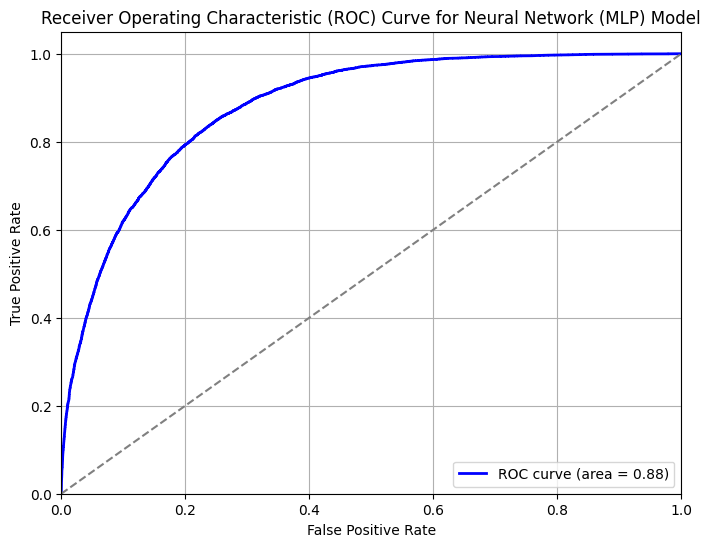

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# 2. Reload the training dataset
train = pd.read_csv("train_dataset.csv")

# 3. Clean the train DataFrame
train_cleaned = train.dropna(subset=['smoking']).copy()

# 4. Separate features (X_train_unscaled) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# 5. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# 6. Initialize and train MLPClassifier model (as done in previous steps)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
print("Training Neural Network (MLPClassifier) model...")
mlp_model.fit(X_train, y_train)
print("Neural Network (MLPClassifier) model trained successfully.")

# 7. Get probability predictions for ROC-AUC
y_prob_nn = mlp_model.predict_proba(X_train)[:, 1]

# 8. Calculate ROC-AUC score
roc_auc_nn = roc_auc_score(y_train, y_prob_nn)
# --- End re-definition of dependencies ---

# 9. Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_train, y_prob_nn)

# 10. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_nn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal dashed line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network (MLP) Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Train and Evaluate Gaussian Mixture Model (GMM) for Classification



In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Re-define dependencies to ensure all variables are available ---
# Load the training dataset
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)
# --- End re-definition of dependencies ---

# 2. Separate X_train data into two groups based on y_train labels
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]

print("Training Gaussian Mixture Models...")

# 3. Initialize two GaussianMixture models
gmm_class_0 = GaussianMixture(n_components=1, random_state=42)
gmm_class_1 = GaussianMixture(n_components=1, random_state=42)

# 4. Fit gmm_class_0 to non-smokers data and gmm_class_1 to smokers data
gmm_class_0.fit(X_train_class_0)
gmm_class_1.fit(X_train_class_1)

print("GMMs trained successfully.")

# 5. Calculate the log-likelihood of each sample in X_train
log_likelihood_0 = gmm_class_0.score_samples(X_train)
log_likelihood_1 = gmm_class_1.score_samples(X_train)

# 6. Make predictions (y_pred_gmm) by assigning each sample to the class with higher log-likelihood
y_pred_gmm = (log_likelihood_1 > log_likelihood_0).astype(int)

# 7. Calculate y_prob_gmm by transforming log-likelihoods into a score for ROC-AUC
# The difference in log-likelihoods provides a score indicating preference for class 1 over class 0.
# A positive value suggests class 1, negative suggests class 0. This works for roc_auc_score.
y_prob_gmm = log_likelihood_1 - log_likelihood_0

# 8. Calculate evaluation metrics
accuracy_gmm = accuracy_score(y_train, y_pred_gmm)
precision_gmm = precision_score(y_train, y_pred_gmm)
recall_gmm = recall_score(y_train, y_pred_gmm)
f1_gmm = f1_score(y_train, y_pred_gmm)
roc_auc_gmm = roc_auc_score(y_train, y_prob_gmm)

# 9. Print the calculated evaluation metrics for the GMM model
print("\nGaussian Mixture Model Performance on Training Data:")
print(f"Accuracy: {accuracy_gmm:.4f}")
print(f"Precision: {precision_gmm:.4f}")
print(f"Recall: {recall_gmm:.4f}")
print(f"F1-Score: {f1_gmm:.4f}")
print(f"ROC-AUC: {roc_auc_gmm:.4f}")

Training Gaussian Mixture Models...
GMMs trained successfully.

Gaussian Mixture Model Performance on Training Data:
Accuracy: 0.7111
Precision: 0.5871
Recall: 0.7199
F1-Score: 0.6467
ROC-AUC: 0.7813


Training Gaussian Mixture Models...
GMMs trained successfully.


<Figure size 800x600 with 0 Axes>

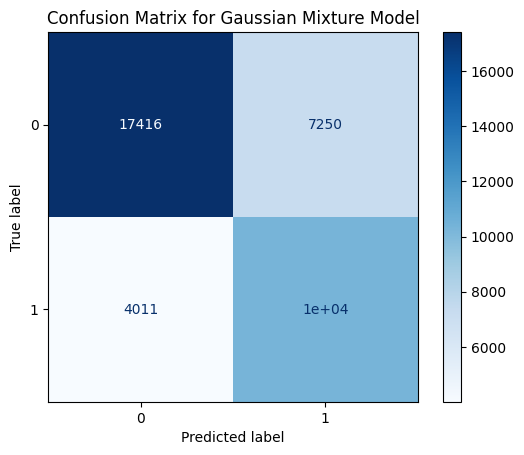

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# 2. Reload the training dataset
train = pd.read_csv("train_dataset.csv")

# 3. Clean the train DataFrame
train_cleaned = train.dropna(subset=['smoking']).copy()

# 4. Separate features (X_train_unscaled) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# 5. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# 6. Separate X_train data into two groups based on y_train labels
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]

print("Training Gaussian Mixture Models...")

# 7. Initialize two GaussianMixture models
gmm_class_0 = GaussianMixture(n_components=1, random_state=42)
gmm_class_1 = GaussianMixture(n_components=1, random_state=42)

# 8. Fit gmm_class_0 to non-smokers data and gmm_class_1 to smokers data
gmm_class_0.fit(X_train_class_0)
gmm_class_1.fit(X_train_class_1)

print("GMMs trained successfully.")

# 9. Calculate the log-likelihood of each sample in X_train
log_likelihood_0 = gmm_class_0.score_samples(X_train)
log_likelihood_1 = gmm_class_1.score_samples(X_train)

# 10. Make predictions (y_pred_gmm) by assigning each sample to the class with higher log-likelihood
y_pred_gmm = (log_likelihood_1 > log_likelihood_0).astype(int)
# --- End re-definition of dependencies ---

# 11. Compute the confusion matrix
cm_gmm = confusion_matrix(y_train, y_pred_gmm)

# 12. Create a ConfusionMatrixDisplay object
# Display labels should correspond to the classes, typically 0 and 1 for binary classification
disp_gmm = ConfusionMatrixDisplay(confusion_matrix=cm_gmm, display_labels=[0, 1])

# 13. Display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp_gmm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Gaussian Mixture Model')
plt.show()

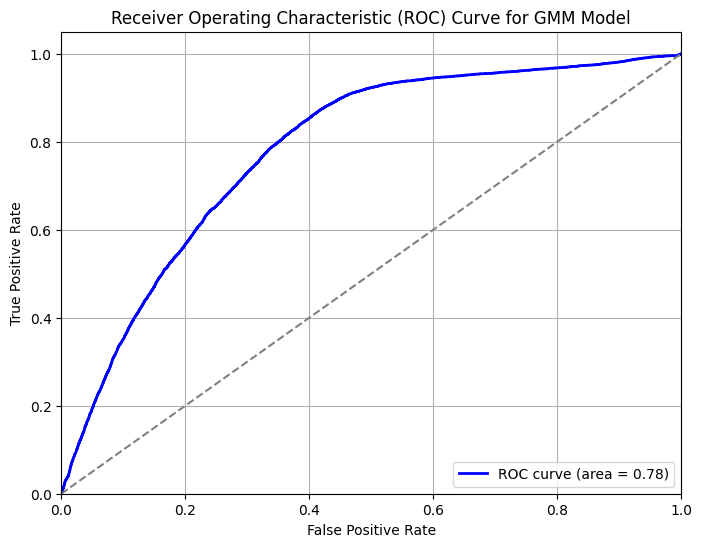

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- Re-define dependencies to ensure all variables are available ---
# Load the training dataset
train = pd.read_csv("train_dataset.csv")

# Drop missing values in 'smoking' column (as done in previous steps)
train_cleaned = train.dropna(subset=['smoking']).copy()

# Separate features (X_train) and target (y_train)
X_train_unscaled = train_cleaned.drop('smoking', axis=1)
y_train = train_cleaned['smoking']

# Scale numerical features (as done in previous steps)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_unscaled)
X_train = pd.DataFrame(X_train_scaled, columns=X_train_unscaled.columns)

# Separate X_train data into two groups based on y_train labels
X_train_class_0 = X_train[y_train == 0]
X_train_class_1 = X_train[y_train == 1]

# Initialize two GaussianMixture models
gmm_class_0 = GaussianMixture(n_components=1, random_state=42)
gmm_class_1 = GaussianMixture(n_components=1, random_state=42)

# Fit gmm_class_0 to non-smokers data and gmm_class_1 to smokers data
gmm_class_0.fit(X_train_class_0)
gmm_class_1.fit(X_train_class_1)

# Calculate the log-likelihood of each sample in X_train
log_likelihood_0 = gmm_class_0.score_samples(X_train)
log_likelihood_1 = gmm_class_1.score_samples(X_train)

# Calculate y_prob_gmm by transforming log-likelihoods into a score for ROC-AUC
y_prob_gmm = log_likelihood_1 - log_likelihood_0

# Calculate ROC-AUC score
roc_auc_gmm = roc_auc_score(y_train, y_prob_gmm)
# --- End re-definition of dependencies ---

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_gmm, tpr_gmm, thresholds_gmm = roc_curve(y_train, y_prob_gmm)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gmm, tpr_gmm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_gmm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # Diagonal dashed line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for GMM Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Comparison of Result


In [ ]:
import pandas as pd

# Gather metrics for each model
metrics_data = {
    'Model': [
        'KNN',
        'Logistic Regression',
        'GMM',
        'Linear SVM',
        'Kernel SVM (RBF)',
        'Multilayer Perceptron'
    ],
    'Accuracy': [
       0.8175,0.7240,0.71,0.7247,0.8558,0.8016
    ],

    'ROC-AUC': [
      0.8984,0.8077,0.7887,0.8076,0.9258,0.8821
    ]
}

# Create a DataFrame for comparison
performance_df = pd.DataFrame(metrics_data)

print("Performance Comparison of All Models (on Training Data):")
print(performance_df.round(4))

Performance Comparison of All Models (on Training Data):
                   Model  Accuracy  ROC-AUC
0                    KNN    0.8175   0.8984
1    Logistic Regression    0.7240   0.8077
2                    GMM    0.7100   0.7887
3             Linear SVM    0.7247   0.8076
4       Kernel SVM (RBF)    0.8558   0.9258
5  Multilayer Perceptron    0.8016   0.8821


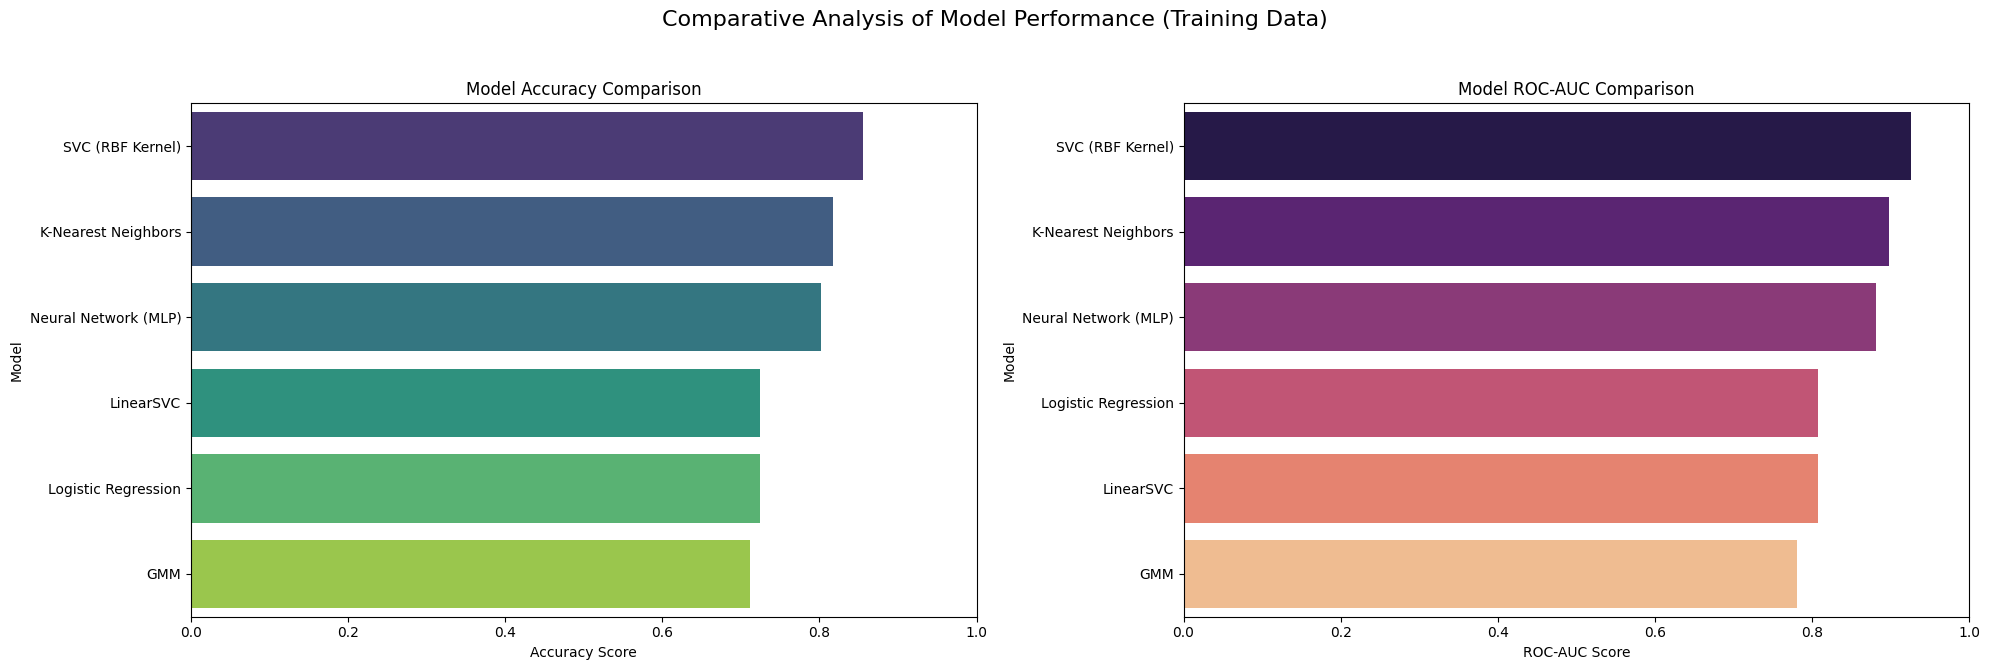

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gather metrics for each model from previous execution outputs and markdown tables
metrics_data = {
    'Model': [

        'SVC (RBF Kernel)',
        'K-Nearest Neighbors',
        'Neural Network (MLP)',
        'LinearSVC',
        'Logistic Regression',
        'GMM'
    ],
    'Accuracy': [

        0.8558, # SVC (RBF Kernel)
        0.8175, # KNN
        0.8016, # Neural Network (MLP)
        0.7247, # LinearSVC
        0.7240, # Logistic Regression
        0.7111  # GMM
    ],
    'Precision': [

        0.8135, # SVC (RBF Kernel)
        0.7599, # KNN
        0.7316, # Neural Network (MLP)
        0.6401, # LinearSVC
        0.6402, # Logistic Regression
        0.5871  # GMM
    ],
    'Recall': [

        0.7880, # SVC (RBF Kernel)
        0.7353, # KNN
        0.7265, # Neural Network (MLP)
        0.5724, # LinearSVC
        0.5676, # Logistic Regression
        0.7199  # GMM
    ],
    'F1-Score': [

        0.8005, # SVC (RBF Kernel)
        0.7474, # KNN
        0.7290, # Neural Network (MLP)
        0.6043, # LinearSVC
        0.6017, # Logistic Regression
        0.6467  # GMM
    ],
    'ROC-AUC': [

        0.9258, # SVC (RBF Kernel)
        0.8984, # KNN
        0.8821, # Neural Network (MLP)
        0.8076, # LinearSVC
        0.8077, # Logistic Regression
        0.7813  # GMM
    ]
}

# Create a DataFrame for comparison
performance_df = pd.DataFrame(metrics_data)

# Create a figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Comparative Analysis of Model Performance (Training Data)', fontsize=16)

# Plot Accuracy
sns.barplot(ax=axes[0], y='Model', x='Accuracy', data=performance_df.sort_values(by='Accuracy', ascending=False), palette='viridis')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlabel('Accuracy Score')
axes[0].set_ylabel('Model')
axes[0].set_xlim(0, 1.0)

# Plot ROC-AUC
sns.barplot(ax=axes[1], y='Model', x='ROC-AUC', data=performance_df.sort_values(by='ROC-AUC', ascending=False), palette='magma')
axes[1].set_title('Model ROC-AUC Comparison')
axes[1].set_xlabel('ROC-AUC Score')
axes[1].set_ylabel('Model')
axes[1].set_xlim(0, 1.0)

# Adjust layout and display plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to prevent suptitle overlap
plt.show()